In [2]:
import pandas as pd                                        #Data processing, CSV files I/O (e.g. pd.read_csv)
import numpy as np                                         #Linear Algebra: Matrices ...
import matplotlib.pyplot as plt                            #Data Visualisation
import seaborn as sns                                      #Data visualisation: Factorplots, barplot 
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [5]:
#To check whether an attribute is a categorical one or not
def is_categorical(array_like):
    return array_like.dtype.name == 'object'

def load_and_see():
    pd.options.display.max_rows = 6
    pd.set_option("expand_frame_repr", True)
    #df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
    #df.dropna(subset=['SalePrice'],inplace=True)
    ##test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
    #X_train,X_test,y_train,y_test = train_test_split(df.drop(['SalePrice'],axis=1),df['SalePrice'], random_state=42,test_size=0.2)
    #train = pd.concat([X_train,y_train],  axis = 1)
    #test = pd.concat([X_test,y_test],axis = 1)
    train = pd.read_csv("train_data.csv")
    test = pd.read_csv("test_data.csv")
    print("================== (TRAINING DATA) ======================================\n")
    display(train)
    print("================== (TEST DATA) ==========================================\n")
    display(test)
    pd.reset_option("display.max_rows")
    print("===============INFO (TRAINING DATA) =====================================\n")
    print(train.info())
    print("===============INFO (TEST DATA) =========================================\n")
    print(test.info())
    print("===============% OF NA PER ATTRIBUTE SORTED (TRAINING DATA) =============\n")
    p_train = (train.isna().sum()/len(train)*100).sort_values(ascending=False)
    print( p_train[:20])
    print("===============% OF NA PER ATTRIBUTE SORTED (TEST DATA) =================\n")
    p_test = (test.isna().sum()/len(test)*100).sort_values(ascending=False)
    print(p_test[:20])
    #print("===============%  (TRAINING DATA) =================\n")
    fig = plt.figure(figsize=(20,10))
    plt.title("TRAINING DATA")
    sns.heatmap(train.isnull(),yticklabels = False, cbar=False)
    plt.show()
    print("===============%  (TEST DATA) =================\n")
    fig = plt.figure(figsize=(20,10))
    plt.title("TEST DATA")
    sns.heatmap(test.isnull(),yticklabels = False, cbar=False)
      
    
    return train,test

================== (TRAINING DATA) ======================================



,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,10/12/2017 8:20,17.32,80.50,0.086,147.700,28.220,30741.00656,19258.50622,10632.94833
1,11/2/2017 2:00,19.59,49.23,0.083,0.095,0.078,23366.15385,18457.43802,10768.19277
2,6/28/2017 16:00,27.72,50.17,4.917,689.700,99.700,33797.08609,21805.82121,22573.29231
...,...,...,...,...,...,...,...,...,...
41929,4/4/2017 3:20,15.04,83.40,0.070,0.029,0.130,23560.81808,12827.29124,15162.18182
41930,5/20/2017 14:30,21.93,64.65,0.069,875.000,104.800,34169.70492,20266.25387,18288.58300
41931,10/27/2017 5:50,17.72,70.30,0.082,0.062,0.107,21023.36980,20315.35270,11601.70213


================== (TEST DATA) ==========================================



,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2/12/2017 14:40,13.28,82.80,0.074,127.000,128.400
1,11/22/2017 15:30,15.72,48.38,4.923,126.200,119.900
2,10/15/2017 1:50,17.25,85.80,0.079,0.055,0.130
...,...,...,...,...,...,...
10480,9/3/2017 7:00,20.34,54.32,4.924,9.500,6.165
10481,11/23/2017 11:40,11.89,60.13,4.921,469.100,45.410
10482,6/14/2017 23:40,18.77,63.76,0.080,0.048,0.141


===============INFO (TRAINING DATA) =====================================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41932 entries, 0 to 41931
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                41932 non-null  object 
 1   Temperature             41932 non-null  float64
 2   Humidity                41932 non-null  float64
 3   WindSpeed               41932 non-null  float64
 4   GeneralDiffuseFlows     41932 non-null  float64
 5   DiffuseFlows            41932 non-null  float64
 6   PowerConsumption_Zone1  41932 non-null  float64
 7   PowerConsumption_Zone2  41932 non-null  float64
 8   PowerConsumption_Zone3  41932 non-null  float64
dtypes: float64(8), object(1)
memory usage: 2.9+ MB
None
===============INFO (TEST DATA) =========================================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10483 entries, 0 to 10482
Data columns (total 6 colu

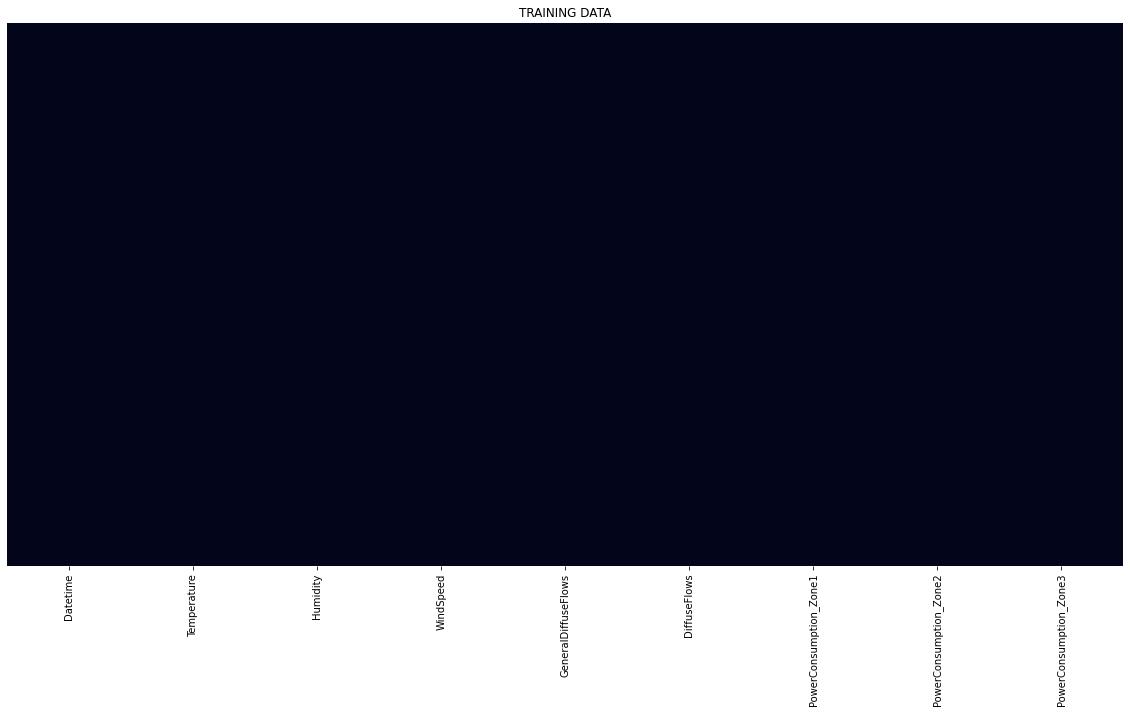

===============%  (TEST DATA) =================



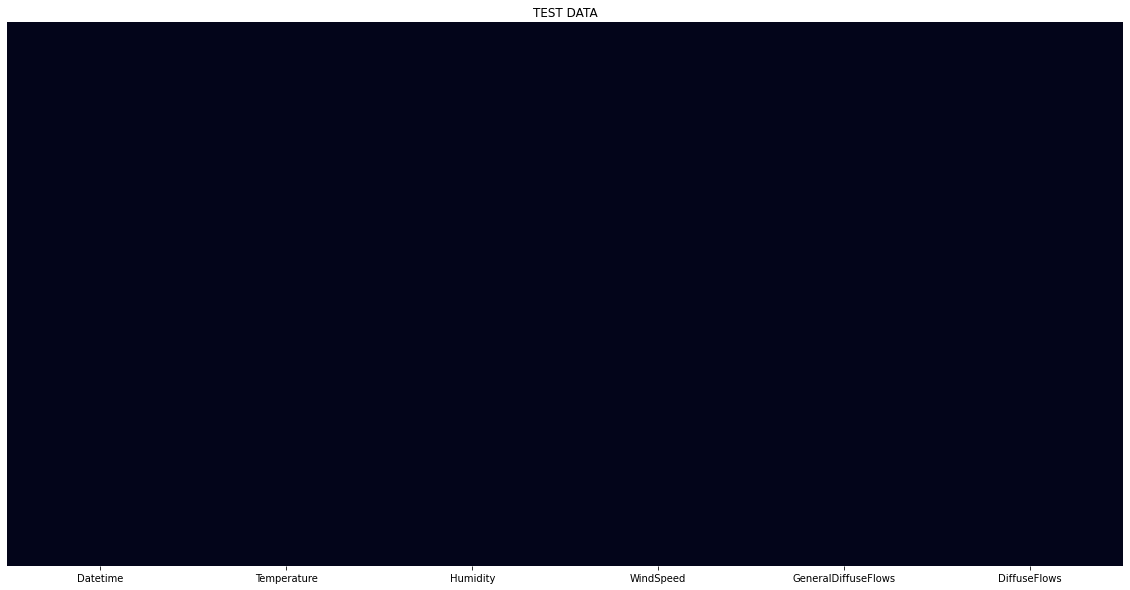

In [6]:
train, test = load_and_see()

In [7]:
train = train.set_index('Datetime')
train.index = pd.to_datetime(train.index)

In [8]:
train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-10-12 08:20:00,17.32,80.50,0.086,147.700,28.220,30741.00656,19258.50622,10632.94833
2017-11-02 02:00:00,19.59,49.23,0.083,0.095,0.078,23366.15385,18457.43802,10768.19277
2017-06-28 16:00:00,27.72,50.17,4.917,689.700,99.700,33797.08609,21805.82121,22573.29231
2017-08-27 07:00:00,23.39,88.60,4.917,8.370,6.426,24420.86570,14301.16156,13247.39812
2017-03-02 18:40:00,18.46,71.40,4.914,39.410,37.970,43708.59574,25880.48780,24741.29032


## Feature Creation

In [9]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(train)

In [10]:
df.head(5)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,,,,,,,,
2017-10-12 08:20:00,17.32,80.50,0.086,147.700,28.220,30741.00656,19258.50622,10632.94833,8,3,4,10,2017,285,12,41
2017-11-02 02:00:00,19.59,49.23,0.083,0.095,0.078,23366.15385,18457.43802,10768.19277,2,3,4,11,2017,306,2,44
2017-06-28 16:00:00,27.72,50.17,4.917,689.700,99.700,33797.08609,21805.82121,22573.29231,16,2,2,6,2017,179,28,26
2017-08-27 07:00:00,23.39,88.60,4.917,8.370,6.426,24420.86570,14301.16156,13247.39812,7,6,3,8,2017,239,27,34
2017-03-02 18:40:00,18.46,71.40,4.914,39.410,37.970,43708.59574,25880.48780,24741.29032,18,3,1,3,2017,61,2,9


In [11]:
df_train = df.loc[df.index < '2017-08-29 13:40:00']
df_test = df.loc[df.index >= '2017-08-29 13:40:00']

## Train / Test Split

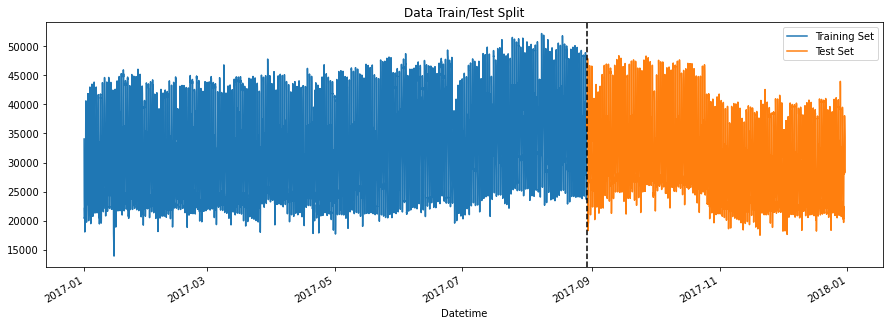

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
df_train['PowerConsumption_Zone1'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_test['PowerConsumption_Zone1'].plot(ax=ax, label='Test Set')
ax.axvline('2017-08-29 13:40:00', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

# Visualize our Feature / Target Relationship

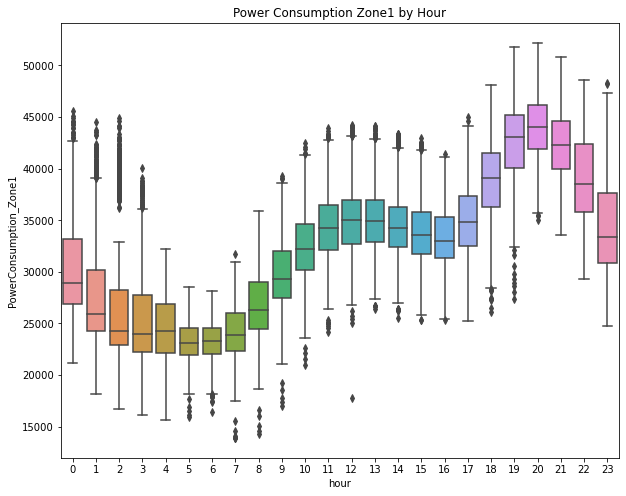

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PowerConsumption_Zone1')
ax.set_title('Power Consumption Zone1 by Hour')
plt.show()

# outli???

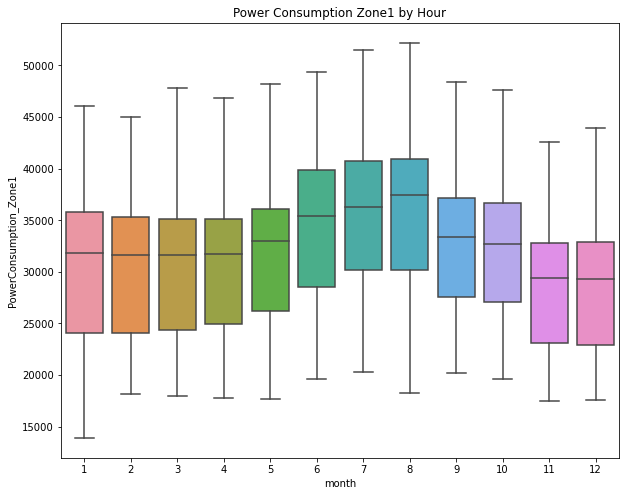

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PowerConsumption_Zone1')
ax.set_title('Power Consumption Zone1 by Hour')
plt.show()

## Create our Model for PowerConsumption_Zone1

In [15]:
FEATURES = ['Temperature','Humidity','WindSpeed','GeneralDiffuseFlows','DiffuseFlows','dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET1 = 'PowerConsumption_Zone1'

X_train1 = df_train[FEATURES]
y_train1 = df_train[TARGET1]

X_test1 = df_test[FEATURES]
y_test1 = df_test[TARGET1]

In [16]:
reg1 =xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=195,
                       objective='reg:linear',
                       max_depth=7,
                       learning_rate=0.01)
reg1.fit(X_train1, y_train1,
        eval_set=[(X_train1, y_train1), (X_test1, y_test1)],
        verbose=1)

[15:57:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:33379.82013	validation_1-rmse:31453.48613
[1]	validation_0-rmse:33047.67533	validation_1-rmse:31087.89950
[2]	validation_0-rmse:32718.86209	validation_1-rmse:30725.95364
[3]	validation_0-rmse:32393.34215	validation_1-rmse:30367.75666
[4]	validation_0-rmse:32071.08772	validation_1-rmse:30013.13067
[5]	validation_0-rmse:31752.06030	validation_1-rmse:29662.20770
[6]	validation_0-rmse:31436.23236	validation_1-rmse:29314.75864
[7]	validation_0-rmse:31123.60895	validation_1-rmse:28969.84415
[8]	validation_0-rmse:30814.08177	validation_1-rmse:28629.33544
[9]	validation_0-rmse:30507.69569	validation_1-rmse:28293.49109
[10]	validation_0-rmse:30204.34118	validation_1-rmse:27959.92901
[11]	validation_0-rmse:29904.06699	validation_1-rmse:27630.88975

[123]	validation_0-rmse:9857.56105	validation_1-rmse:6225.29085
[124]	validation_0-rmse:9761.83338	validation_1-rmse:6137.80019
[125]	validation_0-rmse:9667.03835	validation_1-rmse:6051.60906
[126]	validation_0-rmse:9573.22017	validation_1-rmse:5965.78038
[127]	validation_0-rmse:9480.35456	validation_1-rmse:5881.49777
[128]	validation_0-rmse:9388.37480	validation_1-rmse:5797.17994
[129]	validation_0-rmse:9297.36159	validation_1-rmse:5715.93160
[130]	validation_0-rmse:9207.27462	validation_1-rmse:5637.17657
[131]	validation_0-rmse:9118.02258	validation_1-rmse:5557.48031
[132]	validation_0-rmse:9029.73494	validation_1-rmse:5481.72027
[133]	validation_0-rmse:8942.31641	validation_1-rmse:5405.75055
[134]	validation_0-rmse:8855.89042	validation_1-rmse:5331.97986
[135]	validation_0-rmse:8770.27197	validation_1-rmse:5259.70219
[136]	validation_0-rmse:8685.54710	validation_1-rmse:5189.06452
[137]	validation_0-rmse:8601.63095	validation_1-rmse:5118.66440
[138]	validation_0-rmse:8518.60401	valid

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=195, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

## Feature Importance

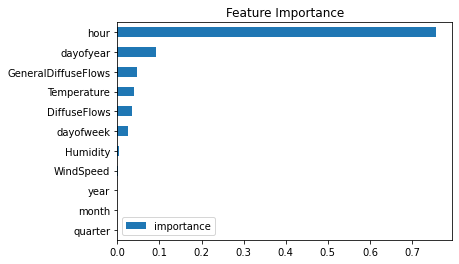

In [25]:
fi = pd.DataFrame(data=reg1.feature_importances_,
             index=reg1.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Forecast on Test

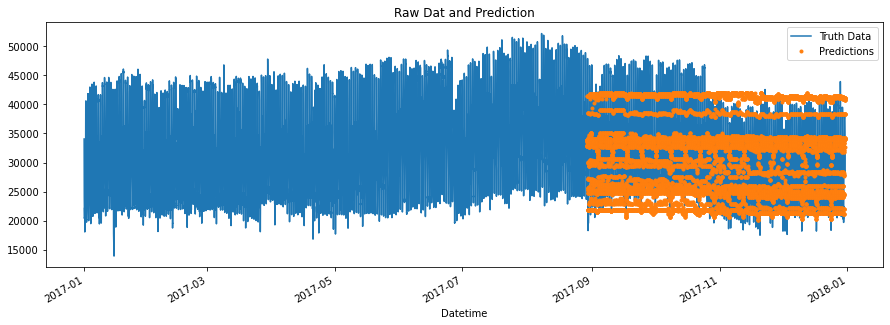

In [14]:
df1 = df.copy()
df_test1 = df_test.copy()
df_test1['prediction'] = reg1.predict(X_test1)
df1 = df1.merge(df_test1[['prediction']], how='left', left_index=True, right_index=True)
ax = df1[['PowerConsumption_Zone1']].plot(figsize=(15, 5))
df1['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [27]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
X_train1 = df[FEATURES]
y_train1 = df[TARGET1]
X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)


In [31]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
np.arange(0,0.11, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [34]:
model = xgb.XGBRegressor()

# Définir les hyperparamètres à rechercher
param_grid = {
    'max_depth': np.arange(1,15),
    'learning_rate': np.arange(0,0.11, 0.01),
    'n_estimators': np.arange(1000, 10001),
    }

# Créer l'objet GridSearchCV avec le modèle, les hyperparamètres et la métrique à optimiser (par exemple, MSE)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Effectuer la recherche des hyperparamètres optimaux
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)


KeyboardInterrupt



In [15]:
X_all1 = df1[FEATURES]
y_all1 = df1[TARGET1]

reg1 = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=10000,
                       objective='reg:linear',
                       max_depth=10,
                       learning_rate=0.01)
reg1.fit(X_all1, y_all1,
        eval_set=[(X_all1, y_all1)],
        verbose=100)

[11:44:18] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32768.25907
[100]	validation_0-rmse:12122.25450
[200]	validation_0-rmse:4614.87563
[300]	validation_0-rmse:1954.24282
[400]	validation_0-rmse:1086.28611
[500]	validation_0-rmse:834.96819
[600]	validation_0-rmse:747.14059
[700]	validation_0-rmse:702.87073
[800]	validation_0-rmse:678.80683
[900]	validation_0-rmse:657.06346
[1000]	validation_0-rmse:641.43814
[1100]	validation_0-rmse:626.84214
[1200]	validation_0-rmse:613.65019
[1300]	validation_0-rmse:600.29454
[1400]	validation_0-rmse:588.49852
[1500]	validation_0-rmse:576.33965
[1600]	validation_0-rmse:563.69292
[1700]	validation_0-rmse:551.97145
[1800]	validation_0-rmse:540.74847
[1900]	validation_0-rmse:529.87116
[2000]	validation_0-rmse:519.69583
[2100]	validation_0-rmse:509.84444
[2200]	validation_0-rmse:500.64640
[2300]	validation_0-rmse:491.77521
[2400]	validation_0-rmse:482.74544
[2500]	vali

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

## Create our Model for PowerConsumption_Zone2

In [16]:
TARGET2 = 'PowerConsumption_Zone2'

X_train2 = df_train[FEATURES]
y_train2 = df_train[TARGET2]

X_test2 = df_test[FEATURES]
y_test2 = df_test[TARGET2]

In [17]:
reg2 =xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=301,
                       objective='reg:linear',
                       max_depth=7,
                       learning_rate=0.01)
reg2.fit(X_train2, y_train2,
        eval_set=[(X_train2, y_train2), (X_test2, y_test2)],
        verbose=1)

[11:52:21] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:20897.03540	validation_1-rmse:22448.06651
[1]	validation_0-rmse:20689.65207	validation_1-rmse:22199.36337
[2]	validation_0-rmse:20484.35273	validation_1-rmse:21951.83739
[3]	validation_0-rmse:20281.11102	validation_1-rmse:21707.91433
[4]	validation_0-rmse:20079.91933	validation_1-rmse:21465.22300
[5]	validation_0-rmse:19880.73786	validation_1-rmse:21226.23020
[6]	validation_0-rmse:19683.56329	validation_1-rmse:20988.44188
[7]	validation_0-rmse:19488.37425	validation_1-rmse:20754.29180
[8]	validation_0-rmse:19295.14641	validation_1-rmse:20521.30579
[9]	validation_0-rmse:19103.85892	validation_1-rmse:20291.89791
[10]	validation_0-rmse:18914.49557	validation_1-rmse:20063.62069
[11]	validation_0-rmse:18727.02730	validation_1-rmse:19838.71669
[12]	validation_0-rmse:18541.44582	validation_1-rmse:19619.08920
[13]	validation_0-rmse:18357.73051	validation_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=301, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

## Feature Importance

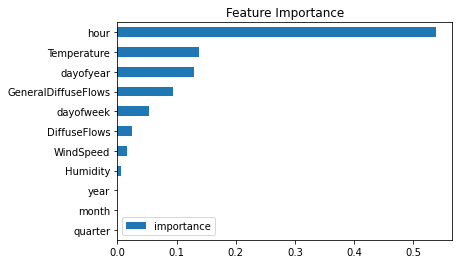

In [18]:
fi = pd.DataFrame(data=reg2.feature_importances_,
             index=reg2.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Forecast on Test

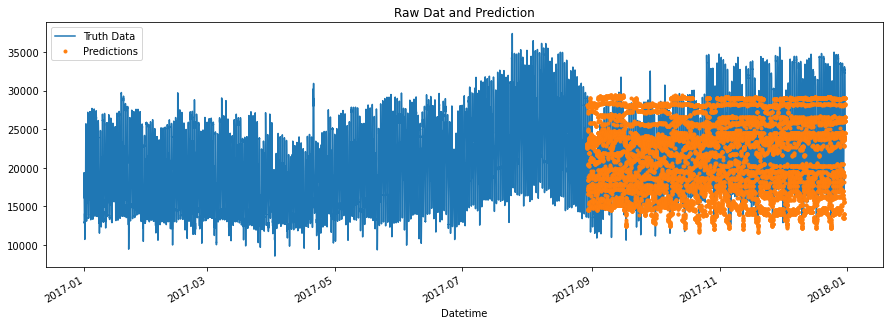

In [19]:
df2 = df.copy()
df_test2 = df_test.copy()
df_test2['prediction'] = reg2.predict(X_test2)
df2 = df2.merge(df_test2[['prediction']], how='left', left_index=True, right_index=True)
ax = df2[['PowerConsumption_Zone2']].plot(figsize=(15, 5))
df2['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [20]:
X_all2 = df2[FEATURES]
y_all2 = df2[TARGET2]

reg2 = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=10000,
                       objective='reg:linear',
                       max_depth=10,
                       learning_rate=0.01)
reg2.fit(X_all2, y_all2,
        eval_set=[(X_all2, y_all2)],
        verbose=100)

[11:52:32] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:21443.93840
[100]	validation_0-rmse:7955.57967
[200]	validation_0-rmse:3043.51125
[300]	validation_0-rmse:1296.95042
[400]	validation_0-rmse:719.13059
[500]	validation_0-rmse:546.15185
[600]	validation_0-rmse:481.73031
[700]	validation_0-rmse:448.44146
[800]	validation_0-rmse:430.45371
[900]	validation_0-rmse:419.98272
[1000]	validation_0-rmse:411.80003
[1100]	validation_0-rmse:406.07337
[1200]	validation_0-rmse:400.85195
[1300]	validation_0-rmse:392.15636
[1400]	validation_0-rmse:387.33897
[1500]	validation_0-rmse:378.71543
[1600]	validation_0-rmse:372.90368
[1700]	validation_0-rmse:365.72233
[1800]	validation_0-rmse:356.55421
[1900]	validation_0-rmse:348.24539
[2000]	validation_0-rmse:342.93046
[2100]	validation_0-rmse:337.74995
[2200]	validation_0-rmse:331.73492
[2300]	validation_0-rmse:327.02469
[2400]	validation_0-rmse:322.49671
[2500]	valida

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

## Create our Model for PowerConsumption_Zone3

In [21]:
TARGET3 = 'PowerConsumption_Zone3'

X_train3 = df_train[FEATURES]
y_train3 = df_train[TARGET3]

X_test3 = df_test[FEATURES]
y_test3 = df_test[TARGET3]

In [22]:
reg3 =xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=104,
                       objective='reg:linear',
                       max_depth=7,
                       learning_rate=0.01)
reg3.fit(X_train3, y_train3,
        eval_set=[(X_train3, y_train3), (X_test3, y_test3)],
        verbose=1)

[12:00:38] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:21044.72408	validation_1-rmse:13377.41563
[1]	validation_0-rmse:20835.99963	validation_1-rmse:13178.40316
[2]	validation_0-rmse:20629.34394	validation_1-rmse:12983.34124
[3]	validation_0-rmse:20424.77994	validation_1-rmse:12781.51496
[4]	validation_0-rmse:20222.27889	validation_1-rmse:12584.29091
[5]	validation_0-rmse:20021.79939	validation_1-rmse:12392.02807
[6]	validation_0-rmse:19823.30565	validation_1-rmse:12205.08905
[7]	validation_0-rmse:19626.79054	validation_1-rmse:12020.22219
[8]	validation_0-rmse:19432.26396	validation_1-rmse:11827.10375
[9]	validation_0-rmse:19239.69145	validation_1-rmse:11639.54778
[10]	validation_0-rmse:19049.04624	validation_1-rmse:11450.52554
[11]	validation_0-rmse:18860.27894	validation_1-rmse:11271.63273
[12]	validation_0-rmse:18673.44386	validation_1-rmse:11088.95625
[13]	validation_0-rmse:18488.46540	validation_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=104, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

## Feature Importance


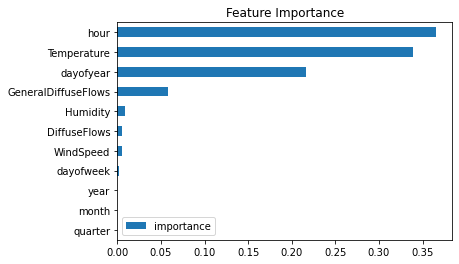

In [23]:
fi = pd.DataFrame(data=reg3.feature_importances_,
             index=reg3.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Forecast on Test


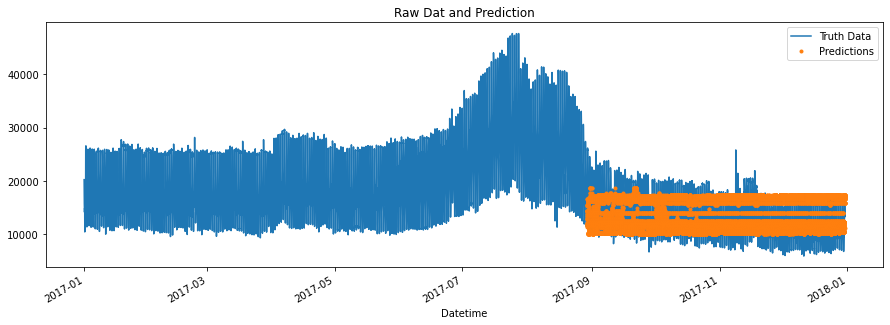

In [24]:
df3 = df.copy()
df_test3 = df_test.copy()
df_test3['prediction'] = reg3.predict(X_test3)
df3 = df3.merge(df_test3[['prediction']], how='left', left_index=True, right_index=True)
ax = df3[['PowerConsumption_Zone3']].plot(figsize=(15, 5))
df3['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

X_all3 = df3[FEATURES]
y_all3 = df3[TARGET3]

reg3 = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=10000,
                       objective='reg:linear',
                       max_depth=10,
                       learning_rate=0.01)
reg3.fit(X_all3, y_all3,
        eval_set=[(X_all3, y_all3)],
        verbose=100)

In [25]:
X_all3 = df3[FEATURES]
y_all3 = df3[TARGET3]

reg3 =xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=10000,
                       objective='reg:linear',
                       max_depth=10,
                       learning_rate=0.01)
reg3.fit(X_all3, y_all3,
        eval_set=[(X_all3, y_all3)],
        verbose=100)

[12:00:42] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:18818.28014
[100]	validation_0-rmse:6989.78258
[200]	validation_0-rmse:2676.20238
[300]	validation_0-rmse:1145.14159
[400]	validation_0-rmse:656.97397
[500]	validation_0-rmse:511.15067
[600]	validation_0-rmse:457.64753
[700]	validation_0-rmse:426.47717
[800]	validation_0-rmse:410.99168
[900]	validation_0-rmse:405.01074
[1000]	validation_0-rmse:397.88250
[1100]	validation_0-rmse:390.27141
[1200]	validation_0-rmse:383.93582
[1300]	validation_0-rmse:376.71387
[1400]	validation_0-rmse:369.47166
[1500]	validation_0-rmse:365.18356
[1600]	validation_0-rmse:360.06868
[1700]	validation_0-rmse:354.71067
[1800]	validation_0-rmse:350.44637
[1900]	validation_0-rmse:342.58529
[2000]	validation_0-rmse:338.18692
[2100]	validation_0-rmse:332.74108
[2200]	validation_0-rmse:326.74150
[2300]	validation_0-rmse:321.61851
[2400]	validation_0-rmse:317.10110
[2500]	valida

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

# Fin Train

In [26]:
sub_df = pd.read_csv("/kaggle/input/EnsiasAIClub-CK/sample_data.csv")

In [27]:
sub_df

,Datetime,predicted_Zone1,predicted_Zone2,predicted_Zone3
0,2/12/2017 14:40,30000,10000,20000
1,11/22/2017 15:30,30000,10000,20000
2,10/15/2017 1:50,30000,10000,20000
3,9/11/2017 23:00,30000,10000,20000
4,12/26/2017 1:20,30000,10000,20000
...,...,...,...,...
10478,2/1/2017 13:00,30000,10000,20000
10479,5/17/2017 14:40,30000,10000,20000
10480,9/3/2017 7:00,30000,10000,20000
10481,11/23/2017 11:40,30000,10000,20000


In [28]:
test = test.set_index('Datetime')
test.index = pd.to_datetime(test.index)
test_f = create_features(test)

In [29]:
sub_df['predicted_Zone1']= reg1.predict(test_f[FEATURES])

In [30]:
sub_df['predicted_Zone2']= reg2.predict(test_f[FEATURES])

In [31]:
sub_df['predicted_Zone3']= reg3.predict(test_f[FEATURES])

In [32]:
sub_df.to_csv('submission11.csv',index=False)

In [13]:
import pandas as pd

# Créer un dataframe de démonstration
df = pd.DataFrame({'A': [1, 2, np.nan, 4],
                   'B': ['a', np.nan, 'c', 'd']})

# Insérer une valeur spécifique si une cellule est manquante
df_filled = df.fillna(0)  # Insérer la valeur 0 pour les NaN

# Afficher le dataframe après insertion des valeurs
print(df_filled)

     A  B
0  1.0  a
1  2.0  0
2  0.0  c
3  4.0  d


In [14]:
import pandas as pd

# Créer un dataframe de démonstration
df = pd.DataFrame({'feature': [1, 2, 3, 4, 5],
                   'target': [2, 4, 6, 8, 10]})

# Calculer la covariance entre le feature et le target
covariance = df['feature'].cov(df['target'])

# Afficher le résultat
print("Covariance :", covariance)


Covariance : 5.0
